In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
from collections import Counter
from functools import reduce
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
##### Load the dataset #####
df = pd.read_csv('/content/adm_data.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
"""
1. It is regression problem.
2. The important columns might be (GRE Score	TOEFL Score	University Rating	SOP	LOR	CGPA	Research	Chance of Admit) - Needs analysis
"""

'\n1. It is regression problem.\n2. The important columns might be (GRE Score\tTOEFL Score\tUniversity Rating\tSOP\tLOR\tCGPA\tResearch\tChance of Admit) - Needs analysis\n'

In [5]:
print(df.loc[:, 'Serial No.'].index, '\n')
print("# of records in this dataset is = ", df.shape[0])

# '''
# Here, the number of records in the dataset and the Serial No. is same.
# '''

##### Delete the Serial No. column from the dataset #####

df.drop('Serial No.', inplace = True, axis = 1)

print('\n')

print("Delete the column of Serial No from the dataset.")

df.head()

RangeIndex(start=0, stop=400, step=1) 

# of records in this dataset is =  400


Delete the column of Serial No from the dataset.


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
##### print the number of rows and columns from the dataset #####

print(f"# of records in this dataset is {df.shape[0]}\n")
print(f"# of columns in this dataset is {df.shape[1]}\n")



# of records in this dataset is 400

# of columns in this dataset is 8



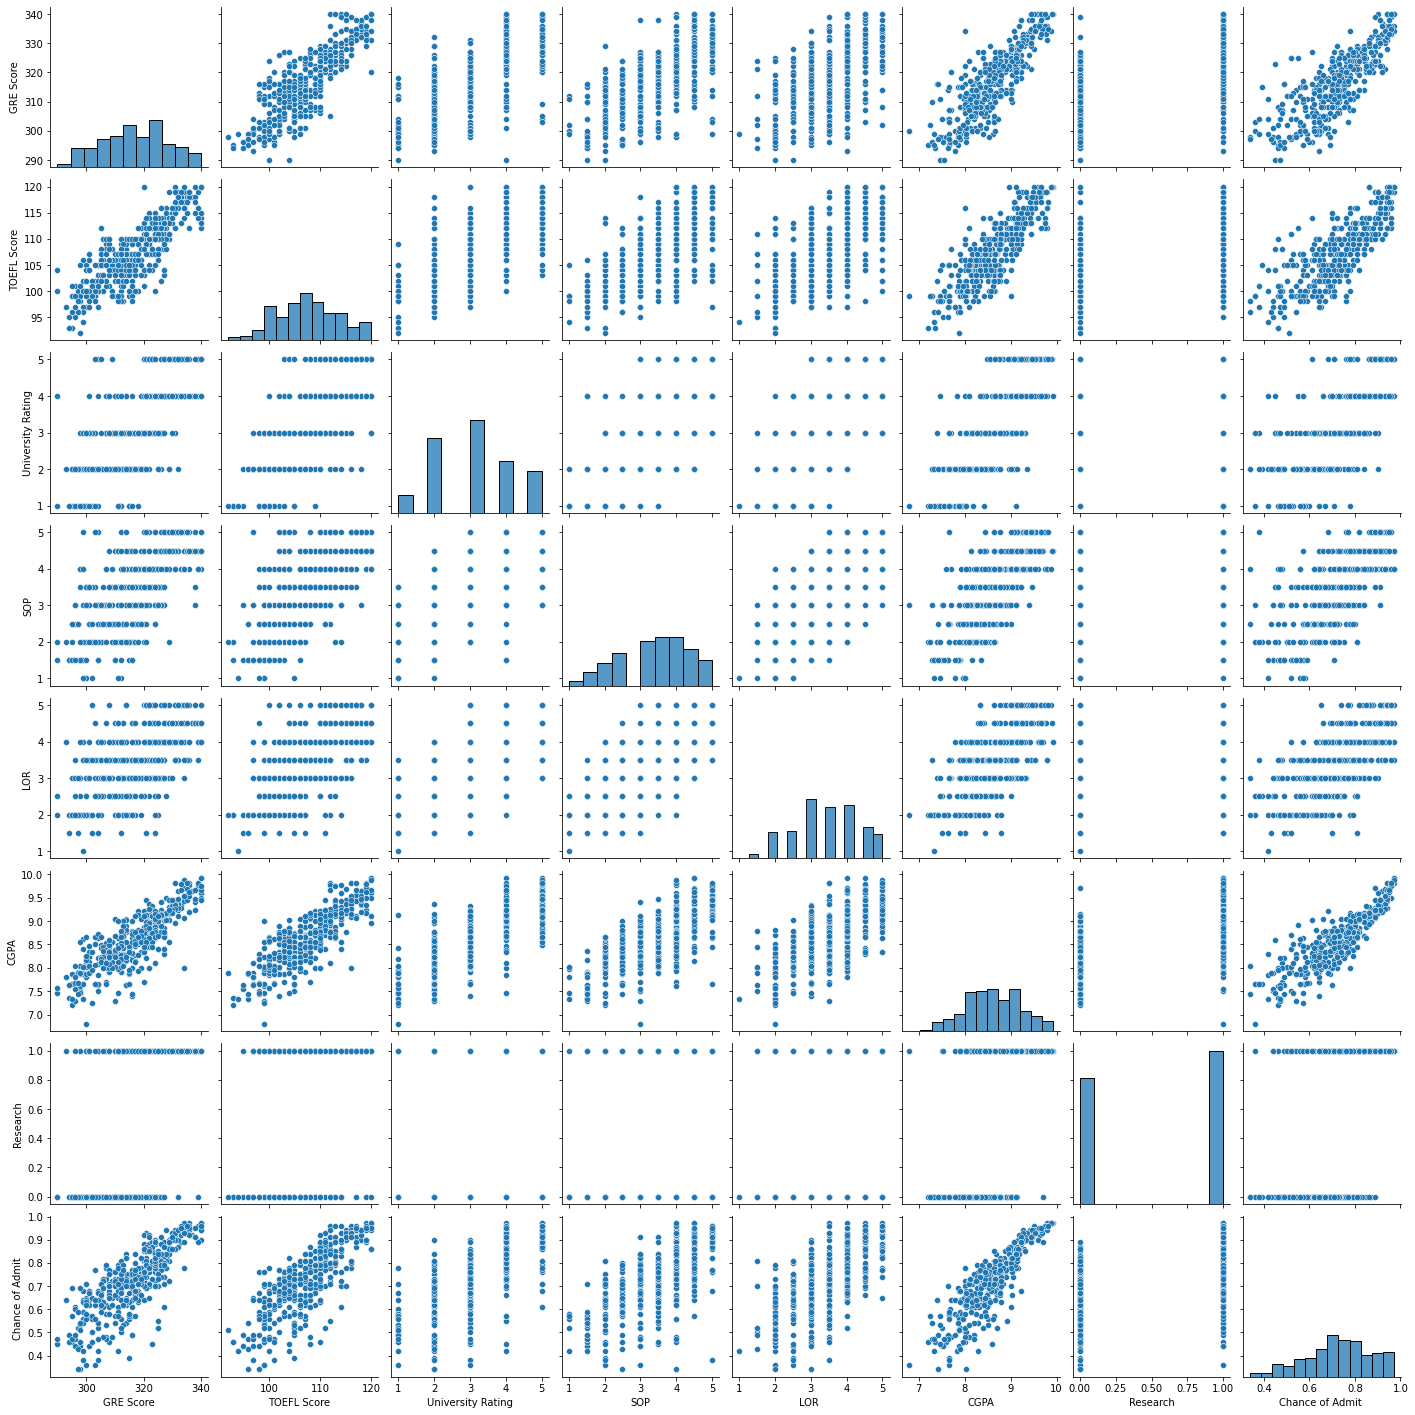

In [7]:
#### Show the pairplot of the whole dataset ####

sns.pairplot(df)

plt.show()

In [8]:
##### Plot the GRE score in a scatter

The Histogram Is Given Below 



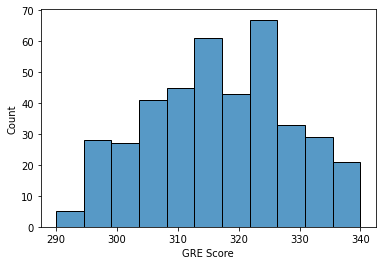

The Scatter Plot Is Given Below 



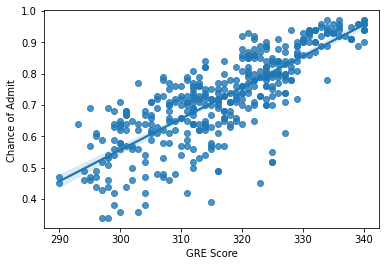

The Distribution Plot Is Given Below


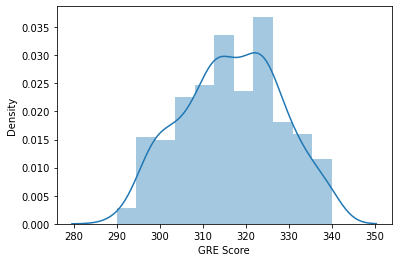

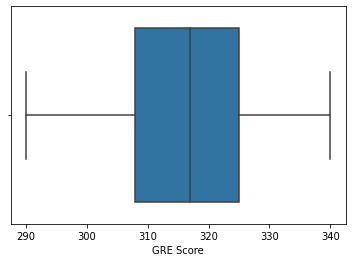

In [9]:
##### Show the GRE Score in the histogram #####

print("The histogram is given below".title(),'\n')

sns.histplot(x = 'GRE Score', data = df)

plt.show()

##### Show the Chance of Admit based on GRE Score #####

print("The scatter plot is given below".title(),'\n')

sns.regplot(x = 'GRE Score', y = 'Chance of Admit ', data = df)

plt.show()

##### Show the distribution of the GRE Score #####

print("The distribution plot is given below".title())

sns.distplot(df.loc[:, 'GRE Score'], kde = True)

plt.show()

##### Show the BoxPlot of this column #####

sns.boxplot(x = 'GRE Score', data = df)

plt.show()

##### Comments after analysis GRE Scores column #####

# """
# 1. Most of the candidates obtain score between 290 - 340 and it is surprised to see that there is a linear relationship between this column and target column.
# 2. There is no OUTLIERS in this column.
# """

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


The Hitogram Of This Toefl Score Column. 



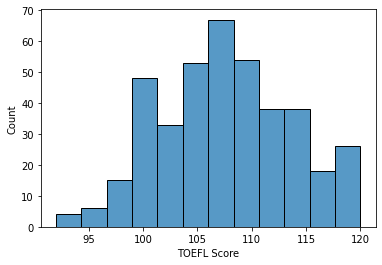

The Scatter Of This Toefl Score And Target Column. 



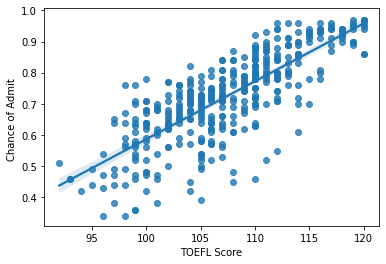

The Distribution Of This Toefl =Column. 



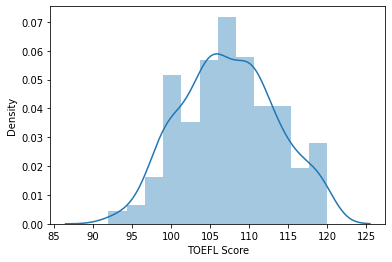

The Boxplot Of This Column


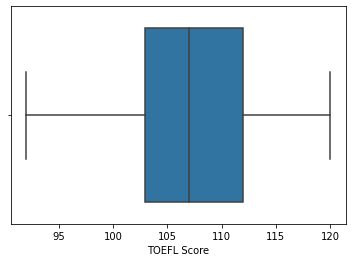

In [11]:
##### Find out, the histogram of this TOFEL Score #####

print("The hitogram of this TOEFL Score column.".title(),'\n')

sns.histplot(df.loc[:, 'TOEFL Score'])

plt.show()

##### Find out, the realtionship between of this and target column #####

print("The scatter of this TOEFL Score and target column.".title(),'\n')

sns.regplot(x = 'TOEFL Score', y = 'Chance of Admit ', data = df)

plt.show()


##### Find out, the distribution of this column #####

print("The distribution of this TOEFL =column.".title(),'\n')

sns.distplot(df.loc[:, 'TOEFL Score'])

plt.show()


##### Find out, the boxplot of this TOEFL Column #####

print("The boxplot of this column".title())

sns.boxplot(df.loc[:, 'TOEFL Score'])

plt.show()


##### Comments after the analysis #####

# """
# 1. Here, we monitor that most of the candidates ontained 90 - 120 marks in TOEFL and there is NO OUTLIERS
# 2. It is surprised to see that there is a relationship between this and target column.
# """


The realtion of GRE Score and TOEFL Score is given below. 



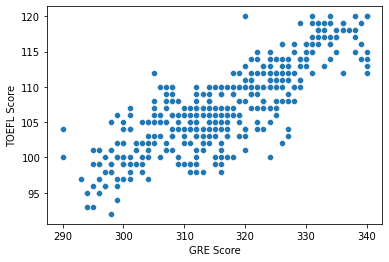

The relation of GRE Score and TOEFL Score with Target column is given below



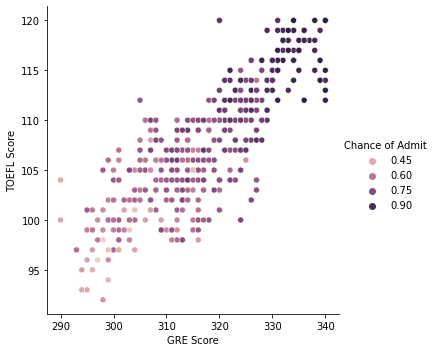

In [12]:
##### Show the realtionship GRE SCore and TOEFL Score with the target column #####

print("The realtion of GRE Score and TOEFL Score is given below.", '\n')

sns.scatterplot(x = 'GRE Score', y = 'TOEFL Score', data = df)

plt.show()

print("The relation of GRE Score and TOEFL Score with Target column is given below\n")

sns.relplot(x = 'GRE Score', y = 'TOEFL Score', hue = 'Chance of Admit ' ,data = df)

plt.show()


##### Comments after analysis #####

# """
# 1. Candiates who are good in GRE are also good in TOEFL, its confirmed.
# """

The Relationship Between Cgpa And Chance Of Admit Is Given Below 



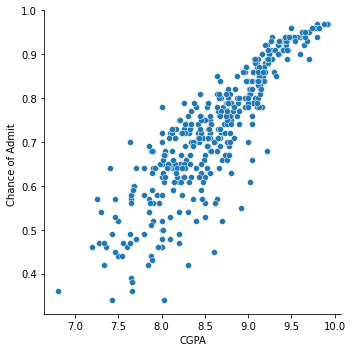

The Relationship Between Cgpa And Chance Of Admit With Gre Score Is Given Below 



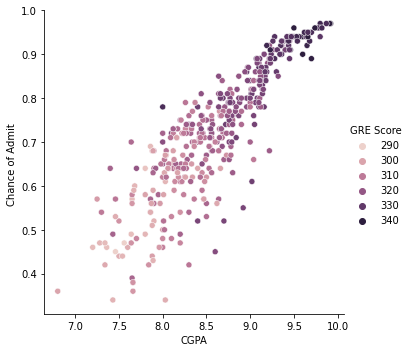

The Relationship Between Cgpa And Chance Of Admit With Toefl Score Is Given Below 



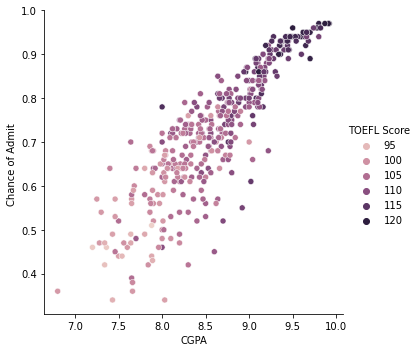

In [13]:
##### Find out the relationship of CGPA and chance of Admit #####

print("The relationship between CGPA and Chance of Admit is given below".title(), '\n')

sns.relplot(x = 'CGPA', y = 'Chance of Admit ', data = df)

plt.show()


##### Find out the relationship of CGPA and chance of Admit with GRE Score#####

print("The relationship between CGPA and Chance of Admit with GRE Score is given below".title(), '\n')

sns.relplot(x = 'CGPA', y = 'Chance of Admit ', hue = 'GRE Score', data = df)

plt.show()

##### Find out the relationship of CGPA and chance of Admit with GRE Score#####

print("The relationship between CGPA and Chance of Admit with TOEFL Score is given below".title(), '\n')

sns.relplot(x = 'CGPA', y = 'Chance of Admit ', hue = 'TOEFL Score',  data = df)

plt.show()

##### Comments ####

# """
# Chance of Admit is quite depends on GRE Score as well as TOEFL Score
# """

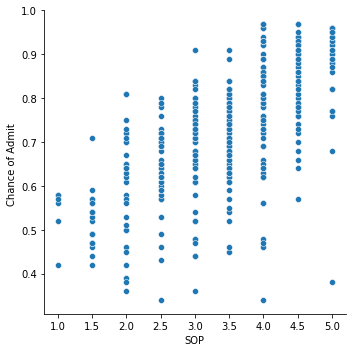

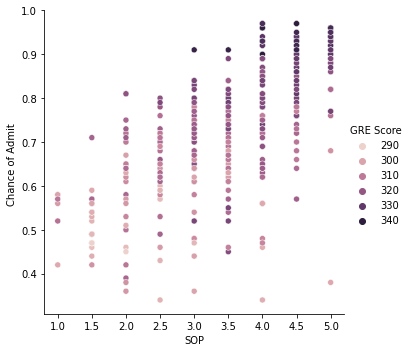

In [14]:
##### Find out, the realtionship between SOP and Chance of Admit #####

sns.relplot(x = 'SOP', y = 'Chance of Admit ', data = df)

plt.show()

##### Find out, the realtionship between SOP and Chance of Admit with GRE Score#####

sns.relplot(x = 'SOP', y = 'Chance of Admit ', hue = 'GRE Score', data = df)

plt.show()


##### Comments after analysis #####

# """
# Candidates who have good SOP has the priority to obtain admission to the higher study.
# """

1    219
0    181
Name: Research, dtype: int64


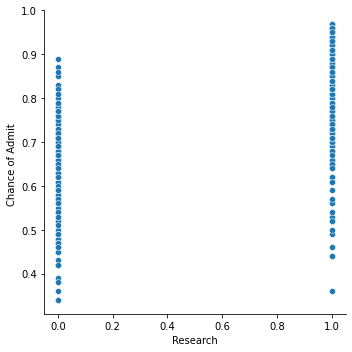

In [15]:
##### Show the value counts of Research #####
print(df.loc[:, 'Research'].value_counts())

##### Find out, the relationship of Research and Chance of Admit #####

sns.relplot(y = 'Chance of Admit ', x = 'Research', data = df)

plt.show()

In [16]:
##### Find out the describe of the dataset #####

df.describe()

##### Comments after analysis #####

# '''
# 1. Mean of Gre 316 and TOEFL 107
# 2. Min of Gre 290 and TOEFL 92
# '''

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


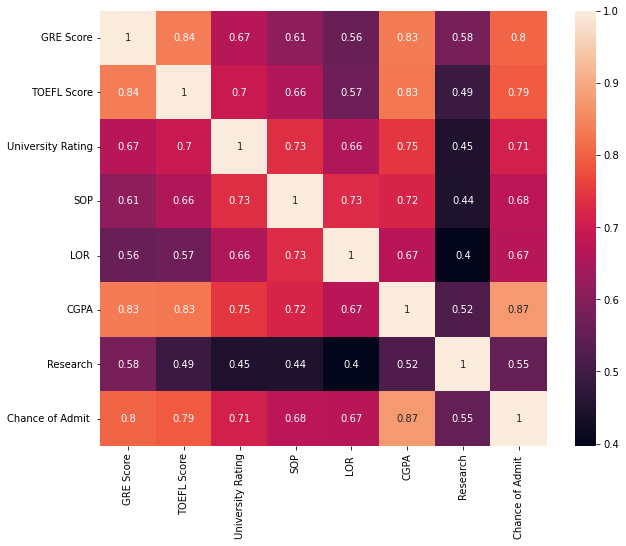

In [17]:
##### Find out the correlation of the dataset #####
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)

plt.show()

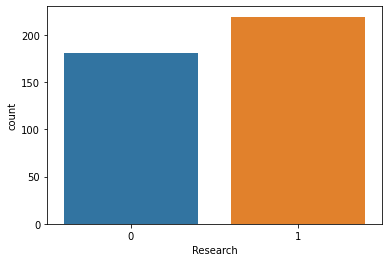

In [18]:
##### Plot the Reseach Column #####

sns.countplot(df.loc[:, 'Research'])

plt.show()

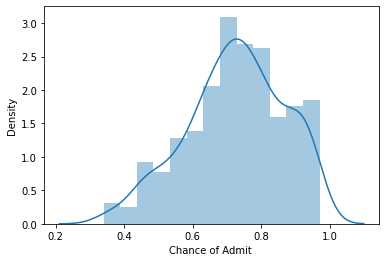

In [19]:
##### Plot the ditribution plot with KDE on Chance of Admit #####

sns.distplot(df.loc[:, 'Chance of Admit '], kde = True)

plt.show()

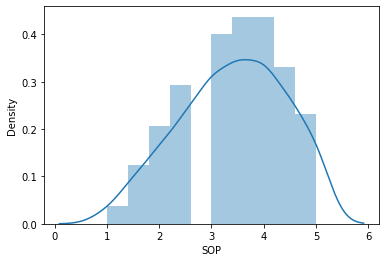

In [20]:
##### Find out, the plot of SOP - Distribution #####

sns.distplot(df.loc[:, 'SOP'])

plt.show()

##### Comments after analysis #####

# """
# *Most of the marks of SOP has been convyed between 3 to 5
# """

In [21]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

The distribution of LOR is given below.



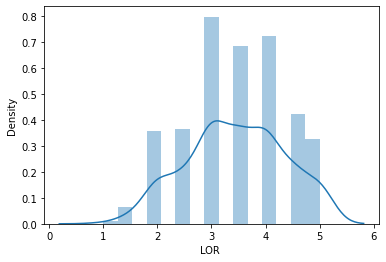

The relationship between of SOP and LOR is given below.



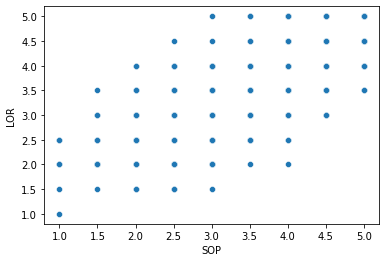

The relationship between of SOP and LOR is given below.



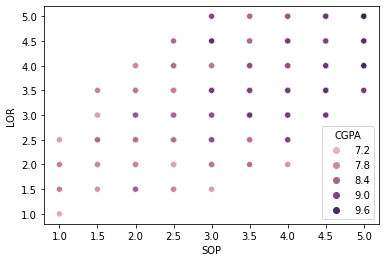

In [22]:
##### Find out, the Distribution of LOR #####

print("The distribution of LOR is given below.\n")

sns.distplot(df.loc[:, 'LOR '])

plt.show()

##### Comments after analysis #####

# """
# Most of the mark of LOR is between 2 to 5
# """


##### The relationship of LOR and SOP #####

print("The relationship between of SOP and LOR is given below.\n")

sns.scatterplot(x = 'SOP', y = 'LOR ', data = df)

plt.show()


##### The relationship of LOR and SOP with CGPA #####

print("The relationship between of SOP and LOR is given below.\n")

sns.scatterplot(x = 'SOP', y = 'LOR ', hue = 'CGPA', data = df)

plt.show()

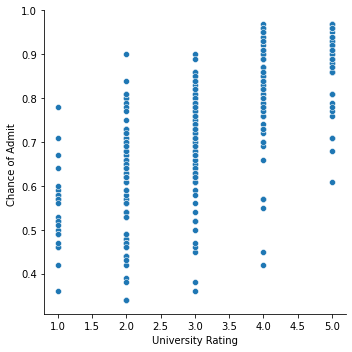

In [23]:
##### Find out, the realtionship between University Rating with Chance of Admit #####

sns.relplot(x = 'University Rating', y = 'Chance of Admit ', data = df)

plt.show()

In [24]:
##### Check that there is NaN value present of the dataset or not #####
if df.isnull().sum().sum() == 0:
  print("There is NO NaN value in the dataset.")

else:
  print("There is NaN value in the dataset.")

There is NO NaN value in the dataset.


In [25]:
##### Print the data types of this dataset #####

df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [26]:
# """
# Find out a query, those who have GRE > 320 and the probability of Chance of Admit is greater than 8.0
# """

print(f"The # of getting Chance of Admit of above query is = {len(df[(df.loc[:, 'GRE Score'] > 320)]['Chance of Admit '] >= 0.80)}")

# """
# Find out a query, those who have TOEFL > 110 and the probability of Chance of Admit is greater than 8.0
# """

print(f"The # of getting Chance of Admit of above query is = {len(df[(df.loc[:, 'TOEFL Score'] > 110)]['Chance of Admit '] >= 0.80)}")

The # of getting Chance of Admit of above query is = 163
The # of getting Chance of Admit of above query is = 120


In [27]:
##### Find out a query, those students CGPA > 8 and GRE is greater than 310 and Chance of Admit is greater than .80 #####

query = df[(df.loc[:, 'CGPA'] > 8.0) & (df.loc[:, 'GRE Score'] > 310) & (df.loc[:, 'Chance of Admit '] > .80)]

print(f"The # of student's chance of admit of that certain above query is = {query.shape[0]}\n")

query.head()

The # of student's chance of admit of that certain above query is = 117



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
5,330,115,5,4.5,3.0,9.34,1,0.90
11,327,111,4,4.0,4.5,9.00,1,0.84
22,328,116,5,5.0,5.0,9.50,1,0.94
23,334,119,5,5.0,4.5,9.70,1,0.95


In [28]:
##### Find out a query, those students CGPA > 8 and TOEFL is greater than 110 and Chance of Admit is greater than .80 #####

query = df[(df.loc[:, 'CGPA'] > 8.0) & (df.loc[:, 'TOEFL Score'] > 110) & (df.loc[:, 'Chance of Admit '] > .80)]

print(f"The # of student's chance of admit of that certain above query is = {query.shape[0]}\n")

query.head()

The # of student's chance of admit of that certain above query is = 90



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
5,330,115,5,4.5,3.0,9.34,1,0.90
11,327,111,4,4.0,4.5,9.00,1,0.84
22,328,116,5,5.0,5.0,9.50,1,0.94
23,334,119,5,5.0,4.5,9.70,1,0.95


In [29]:
##### Find out a query, those candidates of SOP and LOR is greater than 4 #####

query = df[(df.loc[:, 'SOP'] >= 4) & (df.loc[:, 'LOR '] >= 4)]

print(f"The length of equality of SOP and LOR is = {query.shape[0]}\n")

query.head()

The length of equality of SOP and LOR is = 118



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
11,327,111,4,4.0,4.5,9.00,1,0.84
12,328,112,4,4.0,4.5,9.10,1,0.78
22,328,116,5,5.0,5.0,9.50,1,0.94


In [30]:
##### Find out a query, those candidates who have research paper and Chance of Admit is greater than .90 #####

query = df[(df.loc[:, 'Research'] == 1) & (df.loc[:, 'Chance of Admit '] >= 0.90)]

print(f"The # of getting chance of admit in higher study is = {query.shape[0]}\n")

query.head()

The # of getting chance of admit in higher study is = 57



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
5,330,115,5,4.5,3.0,9.34,1,0.90
22,328,116,5,5.0,5.0,9.50,1,0.94
23,334,119,5,5.0,4.5,9.70,1,0.95
24,336,119,5,4.0,3.5,9.80,1,0.97


In [31]:
##### Find out, the resukt of info() of the dataset #####

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


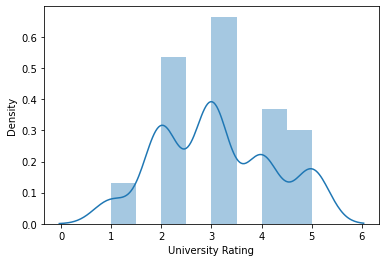

In [32]:
##### Find out, the distribution of University Ranking #####

sns.distplot(df.loc[:, 'University Rating'])

plt.show()

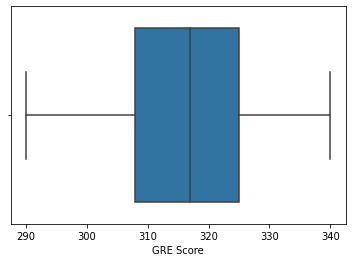

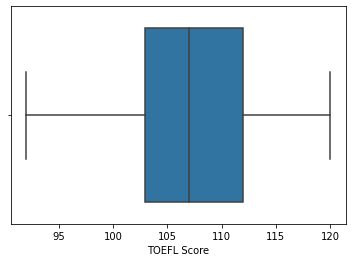

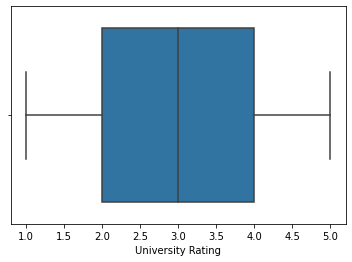

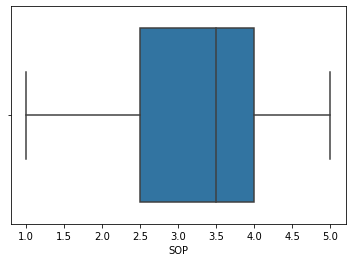

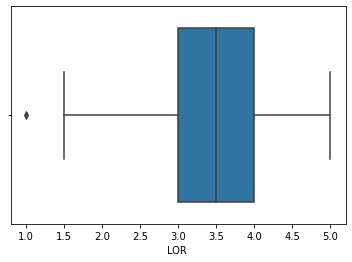

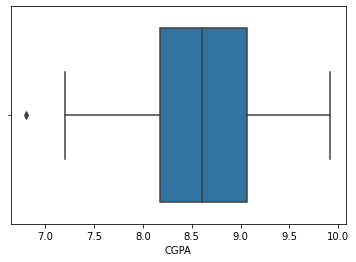

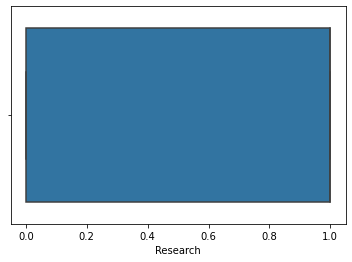

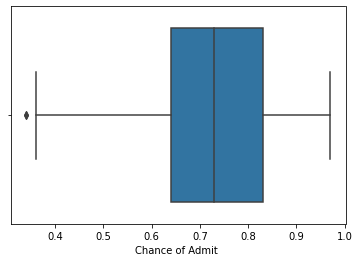

In [33]:
##### Find out the outliers of the dataset #####

columns_ = list(df.columns)

for column_ in columns_:
  sns.boxplot(df.loc[:, column_])
  plt.show()

##### Comments after analysis #####

# """
# There is slightly outliers of this dataset. No needs to clipping and capping.
# """

Using Machine Learning to Predict the model and obtain the performance


In [34]:
##### Preprocessing the dataset - Scaling the dataset #####

minmax_scaler = MinMaxScaler()
new_df = minmax_scaler.fit_transform(df)

new_df = pd.DataFrame(new_df, columns = df.columns)

new_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In [35]:
##### Split the dataset into train and test #####
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(f"The # of X_train is = {X_train.shape}\n")
print(f"The # of X_test  is = {X_test.shape}\n")
print(f"The # of y_train is = {y_train.shape}\n")
print(f"The # of y_test  is = {y_test.shape}\n")

The # of X_train is = (320, 7)

The # of X_test  is = (80, 7)

The # of y_train is = (320,)

The # of y_test  is = (80,)



In [36]:
##### Using KNearestNeighbours Regressor #####

KNeighborsRegressor_ = KNeighborsRegressor()
KNeighborsRegressor_.fit(X_train, y_train)

predicted_ = KNeighborsRegressor_.predict(X_test)

print("The mean squared of this DT Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this DT Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this DT Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this DT Regression is  =  0.0074345999999999995 

The mean absolute of this DT Regression is =  0.061849999999999995 

The R2 score of this DT Regression is      =  0.5812513141604692 



,Actual,Predicted
0,0.68,0.658
1,0.68,0.712
2,0.90,0.936
3,0.79,0.794
4,0.44,0.486


In [37]:
##### Use Linear Regression of this model #####

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

predicted_ = linear_regression.predict(X_test)

print("The mean squared of this Linear Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this Linear Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this Linear Regression is      = ", r2_score(predicted_, y_test),'\n')


predicted_ = pd.DataFrame(predicted_)

LR_df = pd.concat([df.iloc[:, -1], predicted_], axis = 1)

LR_df.rename(columns = {'Chance of Admit ': 'Chance of Admit ', 0: 'Predicted'}, inplace = True)

LR_df.head()

The mean squared of this Linear Regression is  =  0.004617003377284983 

The mean absolute of this Linear Regression is =  0.04795673362091205 

The R2 score of this Linear Regression is      =  0.7270000833319237 



,Chance of Admit,Predicted
0,0.92,0.651174
1,0.76,0.723687
2,0.72,0.935368
3,0.80,0.821643
4,0.65,0.581587


In [38]:
##### Using Decision Tree Regressor #####

decision_tree_regressor_ = DecisionTreeRegressor()
decision_tree_regressor_.fit(X_train, y_train)

predicted_ = decision_tree_regressor_.predict(X_test)

print("The mean squared of this DT Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this DT Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this DT Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this DT Regression is  =  0.00987 

The mean absolute of this DT Regression is =  0.06525 

The R2 score of this DT Regression is      =  0.6275469502045696 



,Actual,Predicted
0,0.68,0.62
1,0.68,0.73
2,0.90,0.94
3,0.79,0.81
4,0.44,0.34


In [39]:
##### Using SGD Regressor #####

SGDRegressor_ = SGDRegressor()
SGDRegressor_.fit(X_train, y_train)

predicted_ = SGDRegressor_.predict(X_test)

print("The mean squared of this SGD Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this SGD Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this SGD Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this SGD Regression is  =  1.3971249053289232e+28 

The mean absolute of this SGD Regression is =  118116232477709.5 

The R2 score of this SGD Regression is      =  -704.4519471405378 



,Actual,Predicted
0,0.68,-1.125191e+14
1,0.68,-1.155287e+14
2,0.90,-1.260603e+14
3,0.79,-1.206140e+14
4,0.44,-1.120488e+14


In [40]:
##### Using SVM #####

SVR_ = SVR(kernel = 'poly')
SVR_.fit(X_train, y_train)

predicted_ = SVR_.predict(X_test)

print("The mean squared of this SVR Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this SVR Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this SVR Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this SVR Regression is  =  0.008221208804492697 

The mean absolute of this SVR Regression is =  0.06950820456565746 

The R2 score of this SVR Regression is      =  0.3319756435614025 



,Actual,Predicted
0,0.68,0.601377
1,0.68,0.648296
2,0.90,0.908606
3,0.79,0.769543
4,0.44,0.560060


In [41]:
##### Using Adboost Regressor #####

AdaBoostRegressor_ = AdaBoostRegressor()
AdaBoostRegressor_.fit(X_train, y_train)

predicted_ = AdaBoostRegressor_.predict(X_test)

print("The mean squared of this Adaboost Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this Adaboost Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this Adaboost Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this Adaboost Regression is  =  0.005581421637407641 

The mean absolute of this Adaboost Regression is =  0.058996387053942334 

The R2 score of this Adaboost Regression is      =  0.6457952755238128 



,Actual,Predicted
0,0.68,0.623103
1,0.68,0.693833
2,0.90,0.895000
3,0.79,0.806203
4,0.44,0.525413


In [42]:
##### Using GradientBoosting Regressor #####

GradientBoostingRegressor_ = GradientBoostingRegressor()
GradientBoostingRegressor_.fit(X_train, y_train)

predicted_ = GradientBoostingRegressor_.predict(X_test)

print("The mean squared of this GBoost Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this GBoost Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this GBoost Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this GBoost Regression is  =  0.00524475241142193 

The mean absolute of this GBoost Regression is =  0.049990106909028074 

The R2 score of this GBoost Regression is      =  0.7167663799866906 



,Actual,Predicted
0,0.68,0.666170
1,0.68,0.735838
2,0.90,0.938099
3,0.79,0.821599
4,0.44,0.584116


In [43]:
##### Using XGBOOST Regressor #####

XGBRegressor_ = XGBRegressor()
XGBRegressor_.fit(X_train, y_train)

predicted_ = XGBRegressor_.predict(X_test)

print("The mean squared of this XGB Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this XGB Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this XGB Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

[05:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The mean squared of this XGB Regression is  =  0.00478627132589274 

The mean absolute of this XGB Regression is =  0.047229476749897005 

The R2 score of this XGB Regression is      =  0.7417590326504712 



,Actual,Predicted
0,0.68,0.675540
1,0.68,0.738503
2,0.90,0.941800
3,0.79,0.828405
4,0.44,0.562529


In [44]:
##### Use RandomForest Regressor #####
##### Using XGBOOST Regressor #####

RandomForestRegressor_ = RandomForestRegressor()
RandomForestRegressor_.fit(X_train, y_train)

predicted_ = RandomForestRegressor_.predict(X_test)

print("The mean squared of this RF Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this RF Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this RF Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this RF Regression is  =  0.004972480124999997 

The mean absolute of this RF Regression is =  0.04933375000000001 

The R2 score of this RF Regression is      =  0.7369358944680178 



,Actual,Predicted
0,0.68,0.6600
1,0.68,0.7247
2,0.90,0.9400
3,0.79,0.8180
4,0.44,0.5814


In [45]:
##### Use Ensemble Voting Regressor ######

VotingRegressor_ = VotingRegressor([('linear_regression', linear_regression), ('RandomForest', RandomForestRegressor_), ('XGB', XGBRegressor_)], n_jobs = -1)

VotingRegressor_.fit(X_train, y_train)

predicted_ = VotingRegressor_.predict(X_test)

print("The mean squared of this VE Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this VE Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this VE Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this VE Regression is  =  0.004585143385289909 

The mean absolute of this VE Regression is =  0.04664120309329477 

The R2 score of this VE Regression is      =  0.7428817288667333 



,Actual,Predicted
0,0.68,0.663905
1,0.68,0.730697
2,0.90,0.938823
3,0.79,0.821649
4,0.44,0.563705


In [46]:
##### Stacking and Blending #####

estimators_ = [
    ('linear_regression', linear_regression),
    ('random_forest', RandomForestRegressor_),
    ('XGB', XGBRegressor_)
]

StackingRegressor_ = StackingRegressor(estimators = estimators_, final_estimator = RandomForestRegressor(n_estimators = 300), cv = 10, n_jobs = -1)

StackingRegressor_.fit(X_train, y_train)

predicted_ = StackingRegressor_.predict(X_test)

print("The mean squared of this StackingRegressor Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this StackingRegressor Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this StackingRegressor Regression is      = ", r2_score(predicted_, y_test),'\n')


y_test_actual = pd.DataFrame(y_test, columns = ['Actual'])
pred_value    = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test_actual, pred_value], axis = 1).head()

The mean squared of this StackingRegressor Regression is  =  0.005220638791666631 

The mean absolute of this StackingRegressor Regression is =  0.05092874999999982 

The R2 score of this StackingRegressor Regression is      =  0.7276528537957374 



,Actual,Predicted
0,0.68,0.616633
1,0.68,0.666333
2,0.90,0.941800
3,0.79,0.850867
4,0.44,0.557767


In [47]:
##### Use KFold Cross Validation with XGBOOST#####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 1
MSE_, MAE_, R2_Score_ = [], [], []

for train_index_, test_index_ in KFold_.split(X, y):

  print(f"Cross Validation {count_} is running".title())

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### Use XGBOOST Algorithm #####

  XGBRegressor_ = XGBRegressor()

  XGBRegressor_.fit(X_train, y_train)

  predicted_ = XGBRegressor_.predict(X_test)
  
  ##### MSE, MAE, R2_Score #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  R2_Score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

Cross Validation 1 Is Running
[05:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation 2 Is Running
[05:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation 3 Is Running
[05:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation 4 Is Running
[05:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation 5 Is Running
[05:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation 6 Is Running
[05:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation 7 Is Running
[05:38:13] WARNING: /workspa

In [48]:
print("The orginal list of MSE", MSE_,'\n')
print("The orginal list of MAE", MAE_,'\n')
print("The orginal list of R2_Score", R2_Score_,'\n')

print("The Average score of MSE is = ", np.array(MSE_).mean(),'\n')
print("The Average score of MAE is = ", np.array(MAE_).mean(),'\n')
print("The Average score of R2 is = ", np.array(R2_Score_).mean(),'\n')

The orginal list of MSE [0.006534021395824789, 0.003987220455730747, 0.004827904329871675, 0.006091160549282838, 0.007128625247934062, 0.003378382312197814, 0.004447452097341262, 0.005339081955271231, 0.0035804520533744715, 0.0035601728133241905] 

The orginal list of MAE [0.0543973328769207, 0.04368082392215729, 0.05390178275108337, 0.05422227323055266, 0.06230016207695007, 0.041863220661878586, 0.048130311042070384, 0.05023040837049484, 0.04688721624016762, 0.0400557951927185] 

The orginal list of R2_Score [0.6954888639940371, 0.7726167357555632, 0.5561687045495769, 0.4173975805396696, 0.5476423546847955, 0.8191714568655536, 0.6998527682974929, 0.6715047393397122, 0.7630688921130319, 0.831403003506411] 

The Average score of MSE is =  0.004887447321015308 

The Average score of MAE is =  0.0495669326364994 

The Average score of R2 is =  0.6774315099645845 



In [49]:
##### Use KFold Cross Validation with RF #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 1
MSE_, MAE_, R2_Score_ = [], [], []

for train_index_, test_index_ in KFold_.split(X, y):

  print(f"Cross Validation {count_} is running".title())

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### Use RFR Algorithm #####

  RandomForestRegressor_ = RandomForestRegressor()

  RandomForestRegressor_.fit(X_train, y_train)

  predicted_ = RandomForestRegressor_.predict(X_test)
  
  ##### MSE, MAE, R2_Score #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  R2_Score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

Cross Validation 1 Is Running
Cross Validation 2 Is Running
Cross Validation 3 Is Running
Cross Validation 4 Is Running
Cross Validation 5 Is Running
Cross Validation 6 Is Running
Cross Validation 7 Is Running
Cross Validation 8 Is Running
Cross Validation 9 Is Running
Cross Validation 10 Is Running


In [50]:
print("The orginal list of MSE", MSE_,'\n')
print("The orginal list of MAE", MAE_,'\n')
print("The orginal list of R2_Score", R2_Score_,'\n')

print("The Average score of MSE is = ", np.array(MSE_).mean(),'\n')
print("The Average score of MAE is = ", np.array(MAE_).mean(),'\n')
print("The Average score of R2 is = ", np.array(R2_Score_).mean(),'\n')

The orginal list of MSE [0.007216481250000004, 0.0033646954999999963, 0.004996922499999999, 0.005600829999999992, 0.007525031250000008, 0.003602609750000011, 0.005237898749999995, 0.005479810749999987, 0.0037925362499999977, 0.00306813775] 

The orginal list of MAE [0.0601275000000001, 0.04057499999999996, 0.053465, 0.05429000000000005, 0.0638375, 0.04360250000000009, 0.0518175, 0.049362500000000004, 0.049247499999999965, 0.03980250000000002] 

The orginal list of R2_Score [0.6298171399739689, 0.8149509897959456, 0.5502639816766945, 0.40657750188568453, 0.5217922753905815, 0.8051630141139697, 0.6782925892402137, 0.6402899647738057, 0.7619768472377366, 0.8615461075712074] 

The Average score of MSE is =  0.004988495374999999 

The Average score of MAE is =  0.05061275000000002 

The Average score of R2 is =  0.6670670411659809 



In [51]:
##### Use KFold Cross Validation with GB #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 1
MSE_, MAE_, R2_Score_ = [], [], []

for train_index_, test_index_ in KFold_.split(X, y):

  print(f"Cross Validation {count_} is running".title())

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### Use GB Algorithm #####

  GradientBoostingRegressor_ = GradientBoostingRegressor()

  GradientBoostingRegressor_.fit(X_train, y_train)

  predicted_ = GradientBoostingRegressor_.predict(X_test)
  
  ##### MSE, MAE, R2_Score #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  R2_Score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

Cross Validation 1 Is Running
Cross Validation 2 Is Running
Cross Validation 3 Is Running
Cross Validation 4 Is Running
Cross Validation 5 Is Running
Cross Validation 6 Is Running
Cross Validation 7 Is Running
Cross Validation 8 Is Running
Cross Validation 9 Is Running
Cross Validation 10 Is Running


In [52]:
print("The orginal list of MSE", MSE_,'\n')
print("The orginal list of MAE", MAE_,'\n')
print("The orginal list of R2_Score", R2_Score_,'\n')

print("The Average score of MSE is = ", np.array(MSE_).mean(),'\n')
print("The Average score of MAE is = ", np.array(MAE_).mean(),'\n')
print("The Average score of R2 is = ", np.array(R2_Score_).mean(),'\n')

The orginal list of MSE [0.006885834388302921, 0.004256439853348372, 0.004716079145583306, 0.005846463290457306, 0.0068790288551830725, 0.0036809740240968244, 0.0049468636192159365, 0.005140293076611464, 0.004540591450320476, 0.003874326342319749] 

The orginal list of MAE [0.056380073285423306, 0.04444763018149198, 0.05296520562149073, 0.05363085383753101, 0.06006505671578305, 0.04390001749006972, 0.05411495199117894, 0.04966265526873215, 0.05059111504590894, 0.040856258896886] 

The orginal list of R2_Score [0.6789669893595021, 0.7654733515590628, 0.5760261472617336, 0.39087413385987935, 0.5521549699236021, 0.7998471772404987, 0.6891007435662196, 0.6661216621287173, 0.6987463310360232, 0.8197832141264307] 

The Average score of MSE is =  0.005076689404543943 

The Average score of MAE is =  0.05066138183344958 

The Average score of R2 is =  0.6637094720061669 



Use Neural Network to check the performance

In [53]:
##### Scaling the data #####
standard_scaler = StandardScaler()
X_ = standard_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.20, random_state = 42)

In [54]:
##### Create the sequential model #####
model = Sequential()

##### Create first hidden layer with neuron 64 #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X.shape[1]))

##### Use the dropout layer for preventing the overfitting #####

model.add(Dropout(0.1))

##### Create second hidden layer with neuron size 32 #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the dropout layer for preventing the overfitting #####

model.add(Dropout(0.1))

##### Create the output layer with linear #####

model.add(Dense(units = 1, activation = 'linear'))

##### Compile the model #####

model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

In [55]:
##### Show the model summary #####
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [56]:
##### Fit the model and check the performance #####

history_ = model.fit(x = X_train, y = y_train, batch_size = 32, validation_data = (X_test, y_test), shuffle = True, epochs = 2000, verbose = 1)

Epoch 1/2000
10/10 [==============================] - 4s 24ms/step - loss: 2.0941 - val_loss: 1.6763
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.7030 - val_loss: 1.3487
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.3636 - val_loss: 1.0987
Epoch 4/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.4729 - val_loss: 0.9070
Epoch 5/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.1942 - val_loss: 0.7650
Epoch 6/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.9933 - val_loss: 0.6650
Epoch 7/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.9238 - val_loss: 0.5934
Epoch 8/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.8727 - val_loss: 0.5401
Epoch 9/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.8816 - val_loss: 0.4958
Epoch 10/2000
10/10 [==============================] - 0s 4ms/step - loss: 0.7988 - val_loss: 0.453

In [57]:
##### Predict the model & check the performance #####
predicted_ = model.predict(X_test)

print("The mean squared of this NN Regression is  = ", mean_squared_error(predicted_, y_test),'\n')
print("The mean absolute of this NN Regression is = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of this NN Regression is      = ", r2_score(predicted_, y_test),'\n')

3/3 [==============================] - 0s 2ms/step
The mean squared of this NN Regression is  =  0.00501016391041721 

The mean absolute of this NN Regression is =  0.05216952484846114 

The R2 score of this NN Regression is      =  0.6798051219982142 



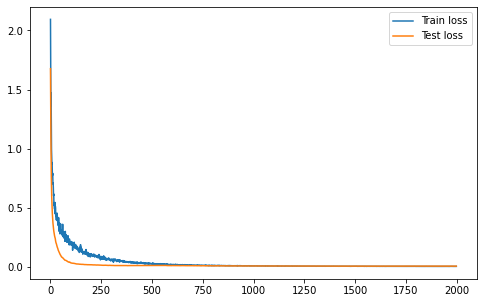

In [58]:
##### Plot the train and test loss #####
plt.figure(figsize = (8, 5))
plt.plot(history_.history['loss'], label = 'train Loss'.capitalize())
plt.plot(history_.history['val_loss'], label = 'test Loss'.capitalize())
plt.legend()
plt.show()

In [59]:
##### Kfold Use to Evaluate the performance #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 1
MSE_, MAE_, R2_Score_ = [], [], []

for train_index_, test_index_ in KFold_.split(X_, y):

  print(f"# of Cross Validation {count_} running.\n")

  X_train, X_test = X_[train_index_], X_[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  model.fit(x = X_train, y = y_train, epochs = 2000, batch_size = 32, validation_data = (X_test, y_test), shuffle = True, verbose = 1)

  predicted_ = model.predict(X_test)

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  R2_Score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

Streaming output truncated to the last 5000 lines.
12/12 [==============================] - 0s 4ms/step - loss: 6.4405e-04 - val_loss: 7.2785e-04
Epoch 1504/2000
12/12 [==============================] - 0s 4ms/step - loss: 6.4589e-04 - val_loss: 7.4810e-04
Epoch 1505/2000
12/12 [==============================] - 0s 4ms/step - loss: 5.3094e-04 - val_loss: 7.4885e-04
Epoch 1506/2000
12/12 [==============================] - 0s 4ms/step - loss: 6.9831e-04 - val_loss: 8.2473e-04
Epoch 1507/2000
12/12 [==============================] - 0s 4ms/step - loss: 6.4145e-04 - val_loss: 7.6689e-04
Epoch 1508/2000
12/12 [==============================] - 0s 4ms/step - loss: 5.5930e-04 - val_loss: 7.2155e-04
Epoch 1509/2000
12/12 [==============================] - 0s 4ms/step - loss: 5.7863e-04 - val_loss: 7.4949e-04
Epoch 1510/2000
12/12 [==============================] - 0s 4ms/step - loss: 5.3248e-04 - val_loss: 7.3650e-04
Epoch 1511/2000
12/12 [==============================] - 0s 4ms/step - loss: 

In [60]:
##### Check the performance #####

print("The orginal of MSE list is      = ", MSE_,'\n')
print("The orginal of MAE list is      = ", MAE_,'\n')
print("The orginal of R2_Score list is = ", R2_Score_,'\n')

print("The MSE is      = ", np.array(MSE_).mean(), '\n')
print("The MAE is      = ", np.array(MAE_).mean(), '\n')
print("The R2_Score is = ", np.array(R2_Score_).mean(), '\n')

The orginal of MSE list is      =  [0.007442158099179072, 0.0036066731760331, 0.0025742693447154755, 0.0023923340363933955, 0.001719844961438383, 0.0010031980870153616, 0.0011356467780536312, 0.0014068826187262121, 0.0008953404417690956, 0.0011635673330976782] 

The orginal of MAE list is      =  [0.06301634380221366, 0.03896988394856453, 0.04023514360189438, 0.03379392570257187, 0.032342226415872574, 0.023720247268676754, 0.02649670779705048, 0.029018824696540834, 0.02223007574677468, 0.027136158138513555] 

The orginal of R2_Score list is =  [0.5839442942516759, 0.811209407393045, 0.751786614353811, 0.7653595129788089, 0.8802261134457997, 0.9187469586734814, 0.9154053766700019, 0.8974381704559228, 0.9363609609960413, 0.9353341351369957] 

The MSE is      =  0.0023339914876421403 

The MAE is      =  0.03369595371186733 

The R2_Score is =  0.8395811544355583 



In [61]:
##### Comments after analysis the NN and ML ######


# """
# Here, Neural Network works very well than ML algorithms, specially in KFold Cross Validation. The result is impressive with 81% R2_score. 
# """

#***********************************************************************************************************************************************#

In [62]:
##### For Single data Prediction #####
GRE_Score   = int(input("Enter the GRE Score.(The Score should be in Integer.)\n"))
TOEFL_Score = int(input("Enter the TOEFL Score.(The Score should be in Integer.)\n"))
Uni_Ranking = int(input("Enter the University ranking.(The number should be in Integer.)\n"))
SOP_Value   = float(input("Enter the SOP Value.(The number might be either Integer or Float.)\n"))
LOR_Value   = float(input("Enter the LOR Value.(The number might be either Integer or Float.)\n"))
CGPA_Value  = float(input("Enter the CGPA Value.(The number might be either Integer or Float.)\n"))
Research    = int(input("Enter 1 or 0 for Research.(1 means Yes, 0 means No.)\n"))
store_data_ = []

if (type(GRE_Score) == int) & (type(TOEFL_Score) == int) & (type(Uni_Ranking) == int) & (type(SOP_Value) == float) & (type(LOR_Value) == float) & (type(Research) == int):
  
  ##### Store all the inputs into the list #####

  store_data_.append(GRE_Score)
  store_data_.append(TOEFL_Score)
  store_data_.append(Uni_Ranking)
  store_data_.append(SOP_Value)
  store_data_.append(LOR_Value)
  store_data_.append(CGPA_Value)
  store_data_.append(Research)

  ##### Convert to the NumPy #####

  store_data_ = np.array(store_data_)

  ##### Extend the dimension so that it can be fitted #####

  store_data_ = np.expand_dims(store_data_, axis = 0)

  ##### Fit this into Neural Network #####

  pred_ = RandomForestRegressor_.predict(store_data_)

  print("*"*80)
  print(f"The prediction in probability of getting chance of admit is: {pred_}")
  print("*"*80)

else:
  print("Enter the data in an appropriate manner. Thanks !")

Enter the GRE Score.(The Score should be in Integer.)
337
Enter the TOEFL Score.(The Score should be in Integer.)
118
Enter the University ranking.(The number should be in Integer.)
4
Enter the SOP Value.(The number might be either Integer or Float.)
4.5
Enter the LOR Value.(The number might be either Integer or Float.)
4.5
Enter the CGPA Value.(The number might be either Integer or Float.)
9.99
Enter 1 or 0 for Research.(1 means Yes, 0 means No.)
1
********************************************************************************
The prediction in probability of getting chance of admit is: [0.9631]
********************************************************************************


Convert the problem into Classification Manner and evaluate the performance in both ML and Neural Network

In [104]:
##### Show the dataset #####
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [105]:
##### Transform the dataset using sacling #####

standard_scaler_ = MinMaxScaler()
transform_df = standard_scaler_.fit_transform(df)
print(transform_df)

[[0.94       0.92857143 0.75       ... 0.91346154 1.         0.92063492]
 [0.68       0.53571429 0.75       ... 0.66346154 1.         0.66666667]
 [0.52       0.42857143 0.5        ... 0.38461538 1.         0.6031746 ]
 ...
 [0.8        0.85714286 0.75       ... 0.84935897 1.         0.9047619 ]
 [0.44       0.39285714 0.5        ... 0.63461538 0.         0.52380952]
 [0.86       0.89285714 0.75       ... 0.91666667 1.         0.96825397]]


In [106]:
##### Use Clustering - KMeans Cluster #####

wcss_ = []
clusters_ = list(range(2, 16))

for count_, n_cluster_ in enumerate(clusters_):

  print(f"{count_} is running.\n")

  KMeans_ = KMeans(n_clusters = n_cluster_, max_iter = 500, random_state = 42, verbose = 0)
  KMeans_.fit_predict(transform_df)
  wcss_.append(KMeans_.inertia_)

print("Clustering is done with succesfully.")

0 is running.

1 is running.

2 is running.

3 is running.

4 is running.

5 is running.

6 is running.

7 is running.

8 is running.

9 is running.

10 is running.

11 is running.

12 is running.

13 is running.

Clustering is done with succesfully.


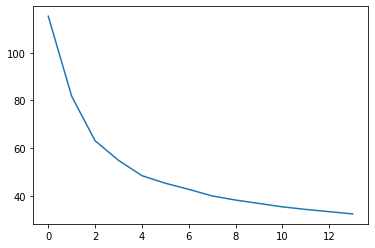

In [107]:
##### Plot the WCSS - Within Clusters Sum of Squared #####

plt.plot(wcss_)

plt.show()

In [108]:
##### Use Clustering - KMeans Cluster with silhouette_score #####

wcss_ = []
clusters_ = list(range(2, 16))

for count_, n_cluster_ in enumerate(clusters_):

  KMeans_ = KMeans(n_clusters = n_cluster_, max_iter = 20000, random_state = 42, verbose = 0)
  KMeans_.fit(transform_df)
  wcss_.append(KMeans_.inertia_)
  print(f"For cluster {n_cluster_} the silhouette_score is = {silhouette_score(transform_df, labels = KMeans_.labels_)}")

For cluster 2 the silhouette_score is = 0.48481967292035977
For cluster 3 the silhouette_score is = 0.41782732670218775
For cluster 4 the silhouette_score is = 0.3498336368778452
For cluster 5 the silhouette_score is = 0.3018274611015169
For cluster 6 the silhouette_score is = 0.28857230684710145
For cluster 7 the silhouette_score is = 0.24927119925755886
For cluster 8 the silhouette_score is = 0.23168474187136734
For cluster 9 the silhouette_score is = 0.23011150484098244
For cluster 10 the silhouette_score is = 0.2270877397979941
For cluster 11 the silhouette_score is = 0.22783963125728193
For cluster 12 the silhouette_score is = 0.20348935380350933
For cluster 13 the silhouette_score is = 0.19825700476330246
For cluster 14 the silhouette_score is = 0.2136706911375553
For cluster 15 the silhouette_score is = 0.20325355156036753


In [114]:
##### Comments after analysis #####

# """
# We monitor that, For Cluster = 2, the score is quite good.
# """

In [113]:
##### Using Agglomerative Clustering #####
clusters_ = list(range(2, 16))

for n_cluster_ in clusters_:
  
  AgglomerativeClustering_ = AgglomerativeClustering(n_clusters = n_cluster_, affinity = "euclidean", linkage = "ward")
  AgglomerativeClustering_.fit(transform_df)

  print(f"For cluster {n_cluster_} the silhouette_score is = {silhouette_score(transform_df, labels = AgglomerativeClustering_.labels_)}")

For cluster 2 the silhouette_score is = 0.48526251718874014
For cluster 3 the silhouette_score is = 0.3911557188122312
For cluster 4 the silhouette_score is = 0.31021578067856176
For cluster 5 the silhouette_score is = 0.28970189654670103
For cluster 6 the silhouette_score is = 0.26658001779491747
For cluster 7 the silhouette_score is = 0.22819621060612277
For cluster 8 the silhouette_score is = 0.21176315140489585
For cluster 9 the silhouette_score is = 0.20218127731308416
For cluster 10 the silhouette_score is = 0.19220882113237178
For cluster 11 the silhouette_score is = 0.19572910528982057
For cluster 12 the silhouette_score is = 0.20057312226548696
For cluster 13 the silhouette_score is = 0.19887339129304848
For cluster 14 the silhouette_score is = 0.1968421655513765
For cluster 15 the silhouette_score is = 0.1834382666819004


<Figure size 720x864 with 0 Axes>

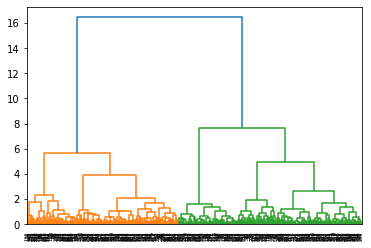

In [118]:
##### Show the dendogram of Agglomerative Clustering #####

import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 12))
plt.figure("Cluster of Agglomerative with Denddrogram.")
shc.dendrogram(shc.linkage(y = transform_df, method = 'ward'))

plt.show()

In [ ]:
##### Comments after analysis #####

# """
# Both, KMeans and Agglomerative Clustering given slightly same result, We should go with n_cluster = 2.
# """

In [124]:
##### Use KMeans Clustering with n_cluster size = 2 #####

KMeans_ =  KMeans(n_clusters = 2)
KMeans_.fit(transform_df)
##### Target column value #####

target_ = KMeans_.labels_

print(target_)

[1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0
 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1
 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1]


In [127]:
##### Concat this target column with the main dataset #####

target_ = pd.DataFrame(target_, columns = ['target'])
cluster_df = pd.concat([df, target_], axis = 1)

cluster_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,target
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


1    216
0    184
Name: target, dtype: int64 

The count plot is given below:



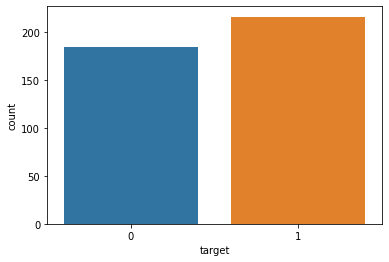

In [136]:
##### Check the data is imbalanced or not #####

print(cluster_df.loc[:, 'target'].value_counts(),'\n')

##### plot this with the countplot to monitor intensively #####

print("The count plot is given below:\n")

sns.countplot(cluster_df.loc[:, 'target'])

plt.show()


##### Comments after analysis #####

# """
# Here, we see that the dataset after cluster is quite balanced.
# """

The relation between GRE Score and target column is given below.



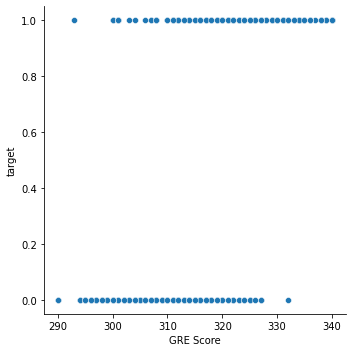

The relation between GRE Score and target column with Chance of Admit is given below.



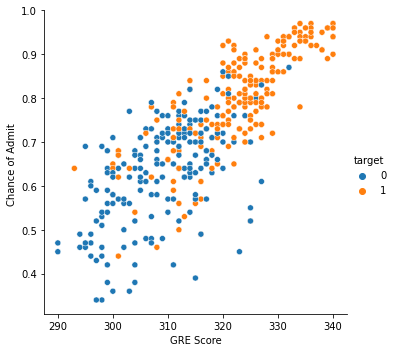

In [143]:
##### Show the relationship of GRE Score and the target column #####

print("The relation between GRE Score and target column is given below.\n")

sns.relplot(x = 'GRE Score', y = 'target', data = cluster_df)

plt.show()

print("The relation between GRE Score and target column with Chance of Admit is given below.\n")

sns.relplot(x = 'GRE Score', y = 'Chance of Admit ', hue = 'target', data = cluster_df)

plt.show()

The relation between GRE Score and target column with Chance of Admit is given below.



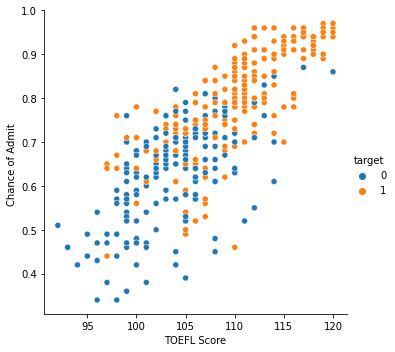

The relation between GRE Score, TOEFL Score and target column with Chance of Admit is given below.



<Figure size 720x864 with 0 Axes>

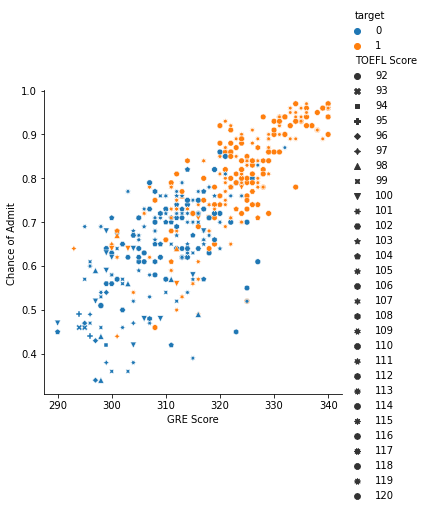

In [149]:
##### The relation between GRE Score and target column with Chance of Admit #####

print("The relation between GRE Score and target column with Chance of Admit is given below.\n")

sns.relplot(x = 'TOEFL Score', y = 'Chance of Admit ', hue = 'target', data = cluster_df)

plt.show()

##### The relation between GRE Score, TOEFL Score and target column with Chance of Admit #####

print("The relation between GRE Score, TOEFL Score and target column with Chance of Admit is given below.\n")

plt.figure(figsize = (10, 12))

sns.relplot(x = 'GRE Score', y = 'Chance of Admit ', hue = 'target', style = 'TOEFL Score', data = cluster_df)

plt.show()

In [156]:
##### Scaling the dataset #####
standard_scaler_ = StandardScaler()
scaled_df = standard_scaler_.fit_transform(cluster_df.iloc[:, :-1])

print(scaled_df)

##### Split the dataset into train and test #####

X = scaled_df
y = cluster_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 , random_state = 42, shuffle = True)

print('\n\n')

print(f"The # of X_train is = {X_train.shape}\n")
print(f"The # of X_test  is = {X_test.shape}\n")
print(f"The # of y_train is = {y_train.shape}\n")
print(f"The # of y_test  is = {y_test.shape}\n")

[[ 1.76210664  1.74697064  0.79882862 ...  1.76481828  0.90911166
   1.37364801]
 [ 0.62765641 -0.06763531  0.79882862 ...  0.45515126  0.90911166
   0.25029671]
 [-0.07046681 -0.56252785 -0.07660001 ... -1.00563118  0.90911166
  -0.03054111]
 ...
 [ 1.15124883  1.41704229  0.79882862 ...  1.42900622  0.90911166
   1.30343855]
 [-0.41952842 -0.72749202 -0.07660001 ...  0.30403584 -1.09997489
  -0.38158839]
 [ 1.41304503  1.58200646  0.79882862 ...  1.78160888  0.90911166
   1.58427637]]



The # of X_train is = (320, 8)

The # of X_test  is = (80, 8)

The # of y_train is = (320,)

The # of y_test  is = (80,)



In [178]:
##### Use SGD Classifier #####

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)

predicted_ = SGDClassifier_.predict(X_test)

print("The accuracy is using SGD Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using SGD Classifier = ", precision_score(predicted_, y_test))
print("The recall is using SGD Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using SGD Classifier  = ", f1_score(predicted_, y_test),'\n\n')

predicted_ = pd.DataFrame(predicted_, columns = ['Predict'])
actual_y_  = pd.DataFrame(y_test.values, columns = ['Actual'])

print(classification_report(predicted_, y_test),'\n\n')

performance_ = pd.concat([actual_y_, predicted_], axis = 1).head(5)

performance_.head()

The accuracy is using SGD Classifier  =  0.95
The precision is using SGD Classifier =  0.9347826086956522
The recall is using SGD Classifier    =  0.9772727272727273
The f1_score is using SGD Classifier  =  0.9555555555555557 


              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.93      0.98      0.96        44

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80
 




,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


In [179]:
##### Use GB Classifier #####

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)

predicted_ = GaussianNB_.predict(X_test)

print("The accuracy is using GB Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using GB Classifier = ", precision_score(predicted_, y_test))
print("The recall is using GB Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using GB Classifier  = ", f1_score(predicted_, y_test),'\n\n')

predicted_ = pd.DataFrame(predicted_, columns = ['Predict'])
actual_y_  = pd.DataFrame(y_test.values, columns = ['Actual'])

print(classification_report(predicted_, y_test),'\n\n')

performance_ = pd.concat([actual_y_, predicted_], axis = 1).head(5)

performance_.head()

The accuracy is using GB Classifier  =  0.9875
The precision is using GB Classifier =  1.0
The recall is using GB Classifier    =  0.9787234042553191
The f1_score is using GB Classifier  =  0.989247311827957 


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.98      0.99        47

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80
 




,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [181]:
##### Use BernoulliNB Naive Classifier #####

BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)

predicted_ = BernoulliNB_.predict(X_test)

print("The accuracy is using BernoulliNB Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using BernoulliNB Classifier = ", precision_score(predicted_, y_test))
print("The recall is using BernoulliNB Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using BernoulliNB Classifier  = ", f1_score(predicted_, y_test))

predicted_ = pd.DataFrame(predicted_, columns = ['Predict'])
actual_y_  = pd.DataFrame(y_test.values, columns = ['Actual'])

pd.concat([actual_y_, predicted_], axis = 1).head(5)

The accuracy is using BernoulliNB Classifier  =  0.8875
The precision is using BernoulliNB Classifier =  0.8260869565217391
The recall is using BernoulliNB Classifier    =  0.9743589743589743
The f1_score is using BernoulliNB Classifier  =  0.8941176470588235


,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


In [183]:
##### Use MLP Classifier #####

MLPClassifier_ = MLPClassifier()
MLPClassifier_.fit(X_train, y_train)

predicted_ = MLPClassifier_.predict(X_test)

print("The accuracy is using MLPClassifier Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using MLPClassifier Classifier = ", precision_score(predicted_, y_test))
print("The recall is using MLPClassifier Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using MLPClassifier Classifier  = ", f1_score(predicted_, y_test))

predicted_ = pd.DataFrame(predicted_, columns = ['Predict'])
actual_y_  = pd.DataFrame(y_test.values, columns = ['Actual'])

pd.concat([actual_y_, predicted_], axis = 1).head(5)

The accuracy is using MLPClassifier Classifier  =  1.0
The precision is using MLPClassifier Classifier =  1.0
The recall is using MLPClassifier Classifier    =  1.0
The f1_score is using MLPClassifier Classifier  =  1.0


,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [184]:
##### Use Perceptron Classifier #####

Perceptron_ = Perceptron()
Perceptron_.fit(X_train, y_train)

predicted_ = Perceptron_.predict(X_test)

print("The accuracy is using Perceptron Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using Perceptron Classifier = ", precision_score(predicted_, y_test))
print("The recall is using Perceptron Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using Perceptron Classifier  = ", f1_score(predicted_, y_test))

predicted_ = pd.DataFrame(predicted_, columns = ['Predict'])
actual_y_  = pd.DataFrame(y_test.values, columns = ['Actual'])

pd.concat([actual_y_, predicted_], axis = 1).head(5)

The accuracy is using Perceptron Classifier  =  0.975
The precision is using Perceptron Classifier =  0.9565217391304348
The recall is using Perceptron Classifier    =  1.0
The f1_score is using Perceptron Classifier  =  0.9777777777777777


,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


In [185]:
##### Use DT Classifier #####

DecisionTreeClassifier_ = DecisionTreeClassifier()
DecisionTreeClassifier_.fit(X_train, y_train)

predicted_ = DecisionTreeClassifier_.predict(X_test)

print("The accuracy is using DT Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using DT Classifier = ", precision_score(predicted_, y_test))
print("The recall is using DT Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using DT Classifier  = ", f1_score(predicted_, y_test))

predicted_ = pd.DataFrame(predicted_, columns = ['Predict'])
actual_y_  = pd.DataFrame(y_test.values, columns = ['Actual'])

pd.concat([actual_y_, predicted_], axis = 1).head(5)

The accuracy is using DT Classifier  =  1.0
The precision is using DT Classifier =  1.0
The recall is using DT Classifier    =  1.0
The f1_score is using DT Classifier  =  1.0


,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [186]:
##### Use KNN Classifier #####

KNeighborsClassifier_ = KNeighborsClassifier()
KNeighborsClassifier_.fit(X_train, y_train)

predicted_ = KNeighborsClassifier_.predict(X_test)

print("The accuracy is using KNN Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using KNN Classifier = ", precision_score(predicted_, y_test))
print("The recall is using KNN Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using KNN Classifier  = ", f1_score(predicted_, y_test))

predicted_ = pd.DataFrame(predicted_, columns = ['Predict'])
actual_y_  = pd.DataFrame(y_test.values, columns = ['Actual'])

pd.concat([actual_y_, predicted_], axis = 1).head(5)

The accuracy is using KNN Classifier  =  1.0
The precision is using KNN Classifier =  1.0
The recall is using KNN Classifier    =  1.0
The f1_score is using KNN Classifier  =  1.0


,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [187]:
##### Use XGBOOST Classifier #####

XGBClassifier_ = XGBClassifier()
XGBClassifier_.fit(X_train, y_train)

predicted_ = XGBClassifier_.predict(X_test)

print("The accuracy is using XGB Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using XGB Classifier = ", precision_score(predicted_, y_test))
print("The recall is using XGB Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using XGB Classifier  = ", f1_score(predicted_, y_test))

predicted_ = pd.DataFrame(predicted_, columns = ['Predict'])
actual_y_  = pd.DataFrame(y_test.values, columns = ['Actual'])

pd.concat([actual_y_, predicted_], axis = 1).head(5)

The accuracy is using XGB Classifier  =  0.9875
The precision is using XGB Classifier =  0.9782608695652174
The recall is using XGB Classifier    =  1.0
The f1_score is using XGB Classifier  =  0.989010989010989


,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


In [188]:
##### Using KFold cross validation #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 1
accuracy_score_, precision_score_, recall_score_, f1_score_ = [], [], [], []

for train_index_, test_index_ in KFold_.split(X, y):

  print(f"# of cross validation {count_} is running.\n")

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  XGBClassifier_ = XGBClassifier()
  XGBClassifier_.fit(X_train, y_train)
  predicted_ = XGBClassifier_.predict(X_test)

  accuracy_score_.append(accuracy_score(predicted_, y_test))
  precision_score_.append(precision_score(predicted_, y_test))
  recall_score_.append(recall_score(predicted_, y_test))
  f1_score_.append(f1_score(predicted_, y_test))

  count_ = count_ + 1

print("Completed. !!")

# of cross validation 1 is running.

# of cross validation 2 is running.

# of cross validation 3 is running.

# of cross validation 4 is running.

# of cross validation 5 is running.

# of cross validation 6 is running.

# of cross validation 7 is running.

# of cross validation 8 is running.

# of cross validation 9 is running.

# of cross validation 10 is running.

Completed. !!


In [206]:
##### Check the performance #####

print("The orginal accuracy score list is : ", accuracy_score_,'\n')
print("The orginal precision score list is: ", precision_score_,'\n')
print("The orginal recall score list is   : ", recall_score_,'\n')
print("The orginal f1_score score list is : ", f1_score_,'\n\n')

print("*"*160)

print("The accuracy score list is : ", np.array(accuracy_score_).mean(),'\n')
print("The precision score list is: ", np.array(precision_score_).mean(),'\n')
print("The recall score list is   : ", np.array(recall_score_).mean(),'\n')
print("The f1_score score list is : ", np.array(f1_score_).mean(),'\n\n')

The orginal accuracy score list is :  [0.975, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.95, 0.975, 1.0] 

The orginal precision score list is:  [0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9565217391304348, 1.0, 1.0] 

The orginal recall score list is   :  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9565217391304348, 0.9583333333333334, 1.0] 

The orginal f1_score score list is :  [0.9743589743589743, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9565217391304348, 0.9787234042553191, 1.0] 


****************************************************************************************************************************************************************
The accuracy score list is :  0.99 

The precision score list is:  0.9906521739130435 

The recall score list is   :  0.9914855072463767 

The f1_score score list is :  0.9909604117744728 




Use Neural Network to evaluate the performance

In [230]:
from sklearn.ensemble._hist_gradient_boosting.loss import BinaryCrossEntropy
##### Create a sequential model #####

model = Sequential()

##### Create first hidden layer with 128 neurons #####

model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', input_dim = X.shape[1], kernel_regularizer = L1()))

##### Create second hidden layer with 64 neurons #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L1()))


##### Create an output layer with sigmoid activation function #####

model.add(Dense(units = 1, activation = 'sigmoid'))

##### Compile the model and run it #####

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


##### show the model summary #####

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1152      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [231]:
##### Fit the model and evaluate the performance #####

history_ = model.fit(x = X_train, y = y_train, epochs = 200, batch_size = 64, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/200
6/6 [==============================] - 1s 33ms/step - loss: 12.9691 - accuracy: 0.8056 - val_loss: 12.5592 - val_accuracy: 0.8750
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 12.3929 - accuracy: 0.9250 - val_loss: 12.0391 - val_accuracy: 0.9250
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 11.8734 - accuracy: 0.9778 - val_loss: 11.5498 - val_accuracy: 0.9750
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 11.3886 - accuracy: 0.9944 - val_loss: 11.0836 - val_accuracy: 1.0000
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 10.9217 - accuracy: 0.9917 - val_loss: 10.6304 - val_accuracy: 1.0000
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 10.4699 - accuracy: 0.9917 - val_loss: 10.1891 - val_accuracy: 1.0000
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 10.0324 - accuracy: 0.9944 - val_loss: 9.7613 - val_accuracy: 1.0000
Epoch 8/200
6

history keys :: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 




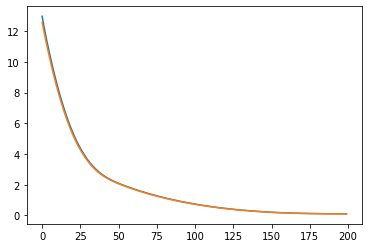

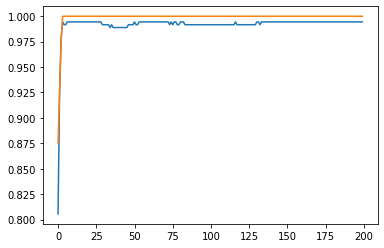

In [232]:
print("history keys ::", history_.history.keys(),'\n\n')

##### plot the loss and val_loss #####

plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.show()

##### plot the loss and val_loss #####

plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.show()

In [233]:
##### Evaluate performance #####

# predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)

# print("The accuracy is using XGB Classifier  = ", accuracy_score(predicted_, y_test))
# print("The precision is using XGB Classifier = ", precision_score(predicted_, y_test))
# print("The recall is using XGB Classifier    = ", recall_score(predicted_, y_test))
# print("The f1_score is using XGB Classifier  = ", f1_score(predicted_, y_test))

predicted_ = [1 if predicted_ > 0.5 else 0 for predicted_ in model.predict(X_test)]

print("The accuracy is using XGB Classifier  = ", accuracy_score(predicted_, y_test))
print("The precision is using XGB Classifier = ", precision_score(predicted_, y_test))
print("The recall is using XGB Classifier    = ", recall_score(predicted_, y_test))
print("The f1_score is using XGB Classifier  = ", f1_score(predicted_, y_test))

2/2 [==============================] - 0s 4ms/step
The accuracy is using XGB Classifier  =  1.0
The precision is using XGB Classifier =  1.0
The recall is using XGB Classifier    =  1.0
The f1_score is using XGB Classifier  =  1.0


In [237]:
X_test.shape

(40, 8)

In [239]:
df.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [255]:
##### For Single predict #####

class higher_study:

  def __init__(self, GRE_Score, TOEFL_Score, Uni_Ranking, SOP, LOR, CGPA, Research, Chance_of_Admit):

    self.GRE_Score = GRE_Score
    self.TOEFL_Score = TOEFL_Score
    self.Uni_Ranking = Uni_Ranking
    self.SOP = SOP
    self.LOR = LOR
    self.CGPA = CGPA
    self.Research = Research
    self.Chance_of_Admit = Chance_of_Admit
    self.store_data_ = []

  def prediction(self):
    if (type(self.GRE_Score) == int) & (type(self.TOEFL_Score) == int) & (type(self.Uni_Ranking) == int) & (type(self.SOP) == float) & (type(self.LOR) == float) & (type(self.CGPA ) == float) & (type(self.Research) == int) & (type(self.Chance_of_Admit) == float):

       self.store_data_.append(self.GRE_Score)
       self.store_data_.append(self.TOEFL_Score)
       self.store_data_.append(self.Uni_Ranking)
       self.store_data_.append(self.SOP)
       self.store_data_.append(self.LOR)
       self.store_data_.append(self.CGPA)
       self.store_data_.append(self.Research)
       self.store_data_.append(self.Chance_of_Admit)

       self.store_data_ = np.array(self.store_data_)
       self.store_data_ = np.expand_dims(self.store_data_, axis = 0)

       return 1 if(model.predict(self.store_data_) > 0.5) else 0


    else:
      print("Put the data in an appropriate manner.")



try:
  GRE_Score   = int(input("Enter the GRE Score.(The Score should be in Integer.)\n"))
  TOEFL_Score = int(input("Enter the TOEFL Score.(The Score should be in Integer.)\n"))
  Uni_Ranking = int(input("Enter the University ranking.(The number should be in Integer.)\n"))
  SOP_Value   = float(input("Enter the SOP Value.(The number might be either Integer or Float.)\n"))
  LOR_Value   = float(input("Enter the LOR Value.(The number might be either Integer or Float.)\n"))
  CGPA_Value  = float(input("Enter the CGPA Value.(The number might be either Integer or Float.)\n"))
  Research    = int(input("Enter 1 or 0 for Research.(1 means Yes, 0 means No.)\n"))
  Chance_     = float(input("Enter your chance of admit.\n"))

  higher_study = higher_study(GRE_Score, TOEFL_Score, Uni_Ranking, SOP_Value, LOR_Value,CGPA_Value, Research, Chance_)
  check_ = higher_study.prediction()
  if check_ == 1:
    print("\n")
    print("You will get chance.")
  else:
    print("With analysing the data of yours, I am regretting to say that you might not be chance of admit in higher study.")

except Exception as e:

  print(e)


Enter the GRE Score.(The Score should be in Integer.)
312
Enter the TOEFL Score.(The Score should be in Integer.)
104
Enter the University ranking.(The number should be in Integer.)
4
Enter the SOP Value.(The number might be either Integer or Float.)
3
Enter the LOR Value.(The number might be either Integer or Float.)
4.5
Enter the CGPA Value.(The number might be either Integer or Float.)
8.6
Enter 1 or 0 for Research.(1 means Yes, 0 means No.)
1
Enter your chance of admit.
0.89
1/1 [==============================] - 0s 19ms/step


You will get chance.
